![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.layers import Activation


In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


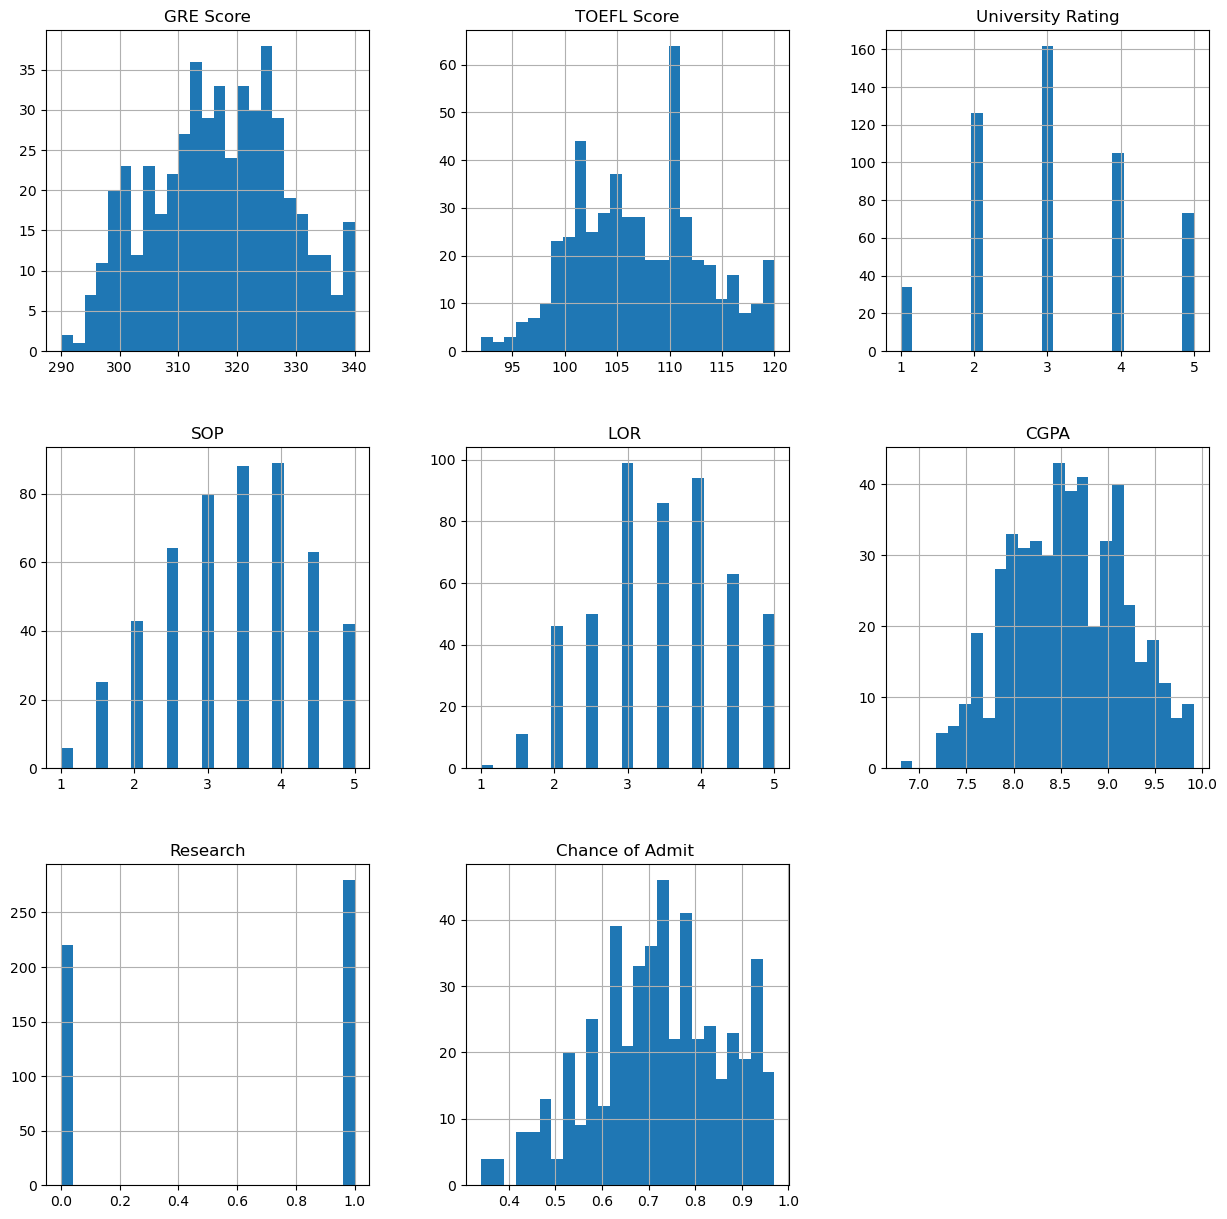

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


In [7]:
Y.head()

Serial No.
1    0.92
2    0.76
3    0.72
4    0.80
5    0.65
Name: Chance of Admit , dtype: float64

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [9]:
# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [10]:
# Celda 1
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

K.clear_session()

output_var = 1
dims = xTrain.shape[1]
print(output_var, ' output variables')
# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

1  output variables


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae', 'mse'])

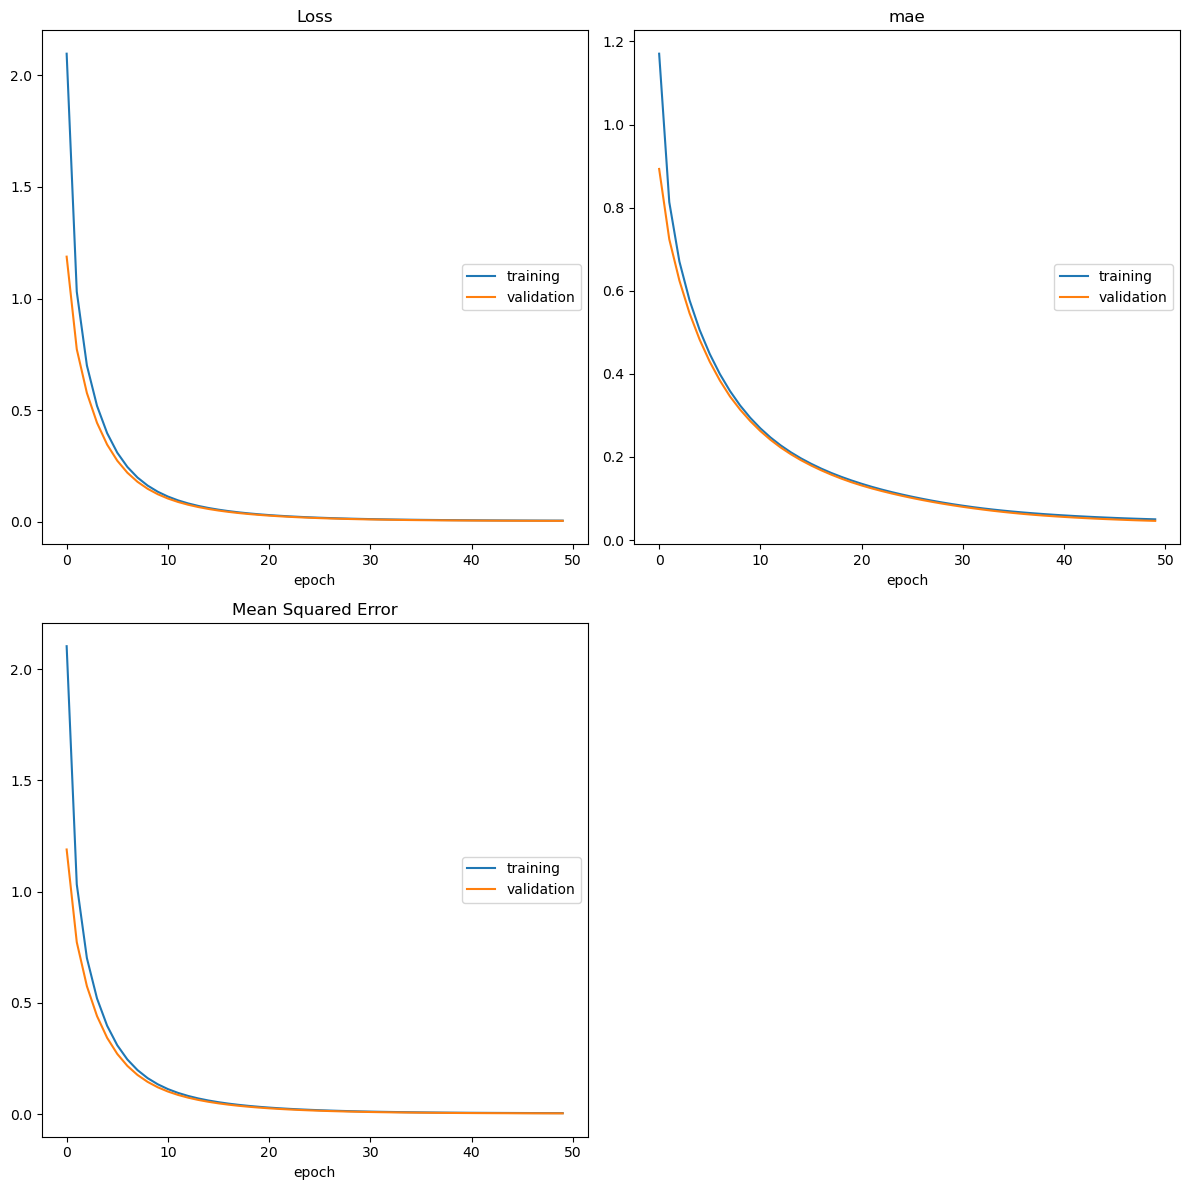

Loss
	training         	 (min:    0.005, max:    2.097, cur:    0.005)
	validation       	 (min:    0.004, max:    1.188, cur:    0.004)
mae
	training         	 (min:    0.050, max:    1.170, cur:    0.050)
	validation       	 (min:    0.046, max:    0.893, cur:    0.046)
Mean Squared Error
	training         	 (min:    0.005, max:    2.103, cur:    0.005)
	validation       	 (min:    0.004, max:    1.189, cur:    0.004)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0048 - mae: 0.0508 - mse: 0.0048 - val_loss: 0.0036 - val_mae: 0.0463 - val_mse: 0.0037


In [12]:
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [13]:
y_pred = model.predict(xTest)

# Cálculo de métricas
mae = mean_absolute_error(yTest, y_pred)
mse = mean_squared_error(yTest, y_pred)
print("Error absoluto medio (MAE):", mae)
print("Error cuadrático medio (MSE):", mse)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Error absoluto medio (MAE): 0.04632255593935648
Error cuadrático medio (MSE): 0.0036777891358886583


Al ser un problema de regresión la función de perdida que nos permite entrenar el mejor modelo es el error cuadratico medio.

Como se escalan los datos con anterioridad, para el procesamiento del modelo, podemos utilizar sin inconveniencia el SGD. El SGD es un optimizar basico y muy usado para el modelado de Redes Neuronales (RN), es simple y facil de usar. Tambien se podria usar el optimizador de momentum, que utiliza el gradiente descendiente pero tiene en cuenta el gradiente de pasos anteriores, permite en teoria una convergencia mas rapida y evita los minimos locales. Por el contrario, si no tuvieramos los datos escalados utilizar el metodo de ADAM podria ser una mejor opción, ya que es un optimizador que recoge varias tecnicas, entre ellas la del momentum, y ajusta las tasas de aprendizaje de cada variable de manera individual. Es un optimizar muy robusto y eficiente . Funciona muy bien con datos escalados o no escalados. Pero como ya escalamos las variables, vemos conveniente usar el SDG como optimizador ya que funciona muy bien con bases de datos simples. Para robustecer el anterior argumento, tambien utilizamos el optimizador ADAM, que en este caso se demoraba mas en converger, y para tener mejores resultados requeria de mas epocas.

En cuanto a las epocas, identificamos que con un valor de 50 epocas le damos espacio al modelo para que puede estabilizarse, aunque los graficos nos indican que el modelo converge mucho mas rapido.

Luego de entrenado el modelo de RN de una sola capa con las caracteristicas señaladas anteriormente en cuanto a función de perdida, optimizador y numero de epocas presento un MAE de 0.046 y un MSE de 0.0036. Lo que indica, que el modelo de RN de una sola capa predice muy bien la probabilidad de que un estudiante sea admitido a la universidad.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [14]:
# Celda 2
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

K.clear_session()

# Definición red neuronal con la función Sequential()
modelo2 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
modelo2.add(Dense(256, input_shape=(dims,),activation='relu'))
modelo2.add(Dense(256,activation='relu'))
modelo2.add(Dense(output_var))
modelo2.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(modelo2.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,097 (266.00 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
modelo2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae', 'mse'])

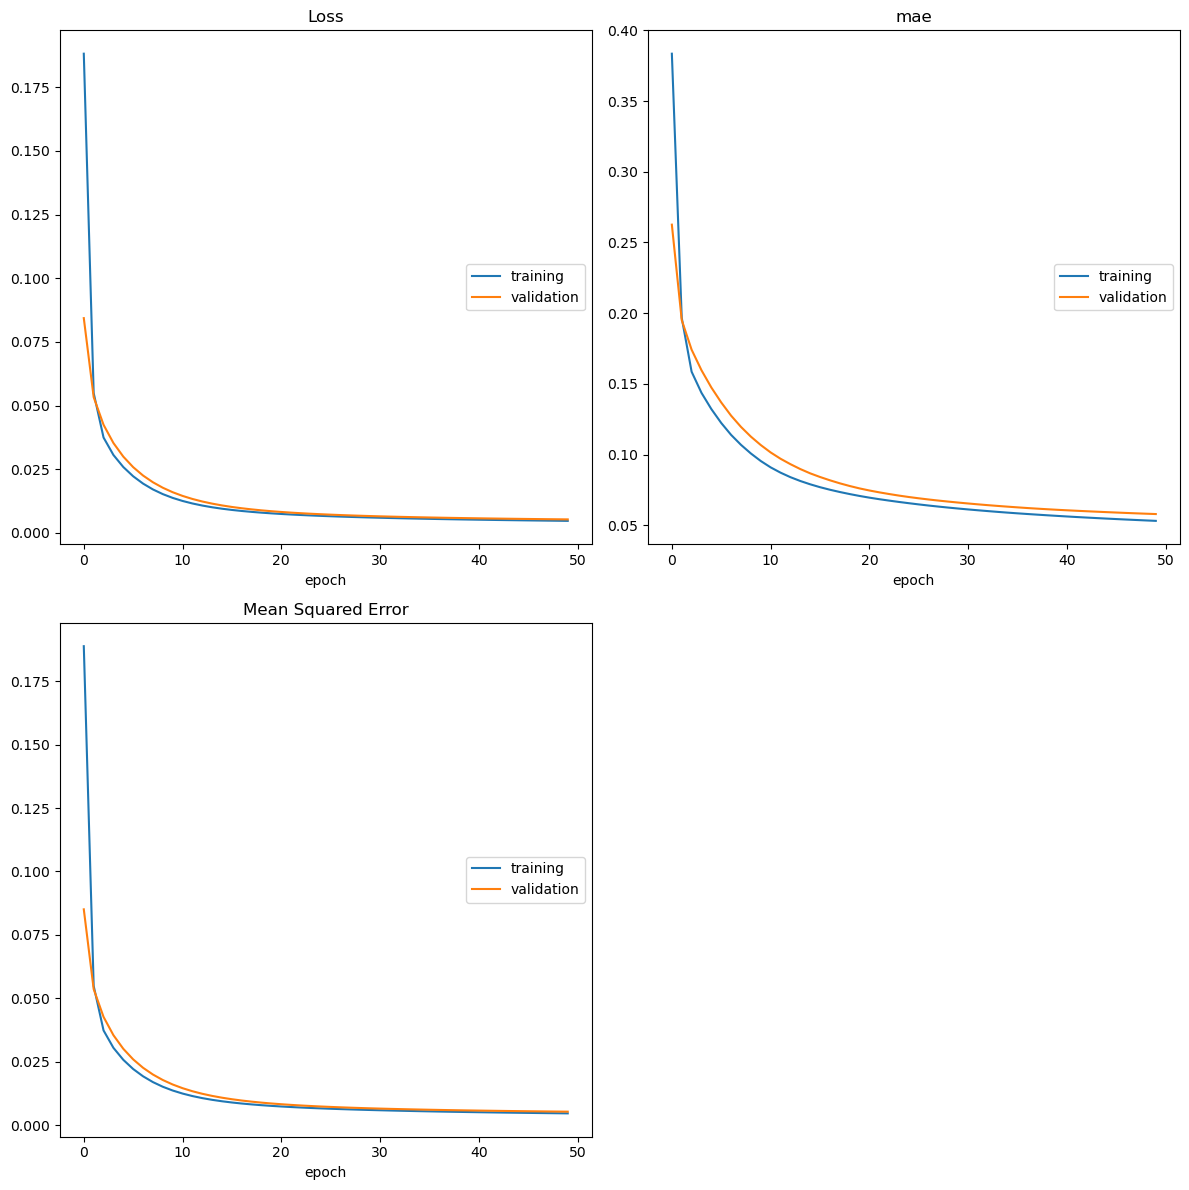

Loss
	training         	 (min:    0.005, max:    0.188, cur:    0.005)
	validation       	 (min:    0.005, max:    0.084, cur:    0.005)
mae
	training         	 (min:    0.053, max:    0.384, cur:    0.053)
	validation       	 (min:    0.058, max:    0.263, cur:    0.058)
Mean Squared Error
	training         	 (min:    0.005, max:    0.189, cur:    0.005)
	validation       	 (min:    0.005, max:    0.085, cur:    0.005)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046 - mae: 0.0529 - mse: 0.0046 - val_loss: 0.0053 - val_mae: 0.0579 - val_mse: 0.0054


In [16]:
modelo2.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [17]:
y_pred2 = modelo2.predict(xTest)

# Cálculo de métricas
mae2 = mean_absolute_error(yTest, y_pred2)
mse2 = mean_squared_error(yTest, y_pred2)
print("Error absoluto medio (MAE) - Red con dos capas:", mae2)
print("Error cuadrático medio (MSE) - Red con dos capas:", mse2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Error absoluto medio (MAE) - Red con dos capas: 0.05789312415122985
Error cuadrático medio (MSE) - Red con dos capas: 0.005360960068283673


Se utiliza un modelo de RN multicapa, especificamente de dos capas. Ambas capas con 256 neuronas cada una. Aqui mantenemos todos los argumentos sobre la función de perdida, el optimizador y el numero de epocas que se explicaron en el punto 1. Adicional, al modelo de RN multicapa se utiliza la función de activación ReLU. Una de las funciones de activación comunmente mas usadas dada su simplicidad y eficacia en la aceleración del proceso de entrenamiento.

Luego de entrenado el modelo de RN multicapa con las caracteristicas señaladas anteriormente se presenta un MAE de 0.057 y un MSE de 0.0053. Lo que indica, que el modelo de RN multicapa predice muy bien la probabilidad de que un estudiante sea admitido a la universidad. Pero, el modelo de RN de una capa sigue presentando mejores medidas de desempeño, por lo que incluir capas adicionales no parece tener mejoras para predecir la probabilidad de que un estudiante sea admitido a la universidad.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [18]:
# Celda 3
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

K.clear_session()

# Definición red neuronal con la función Sequential()
modelo3 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
modelo3.add(Dense(256, input_shape=(dims,),activation='relu'))
modelo3.add(Dropout(0.5))
modelo3.add(Dense(256,activation='relu'))
modelo3.add(Dropout(0.5))
modelo3.add(Dense(output_var))
modelo3.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(modelo3.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,097 (266.00 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [20]:
modelo3.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae', 'mse'])

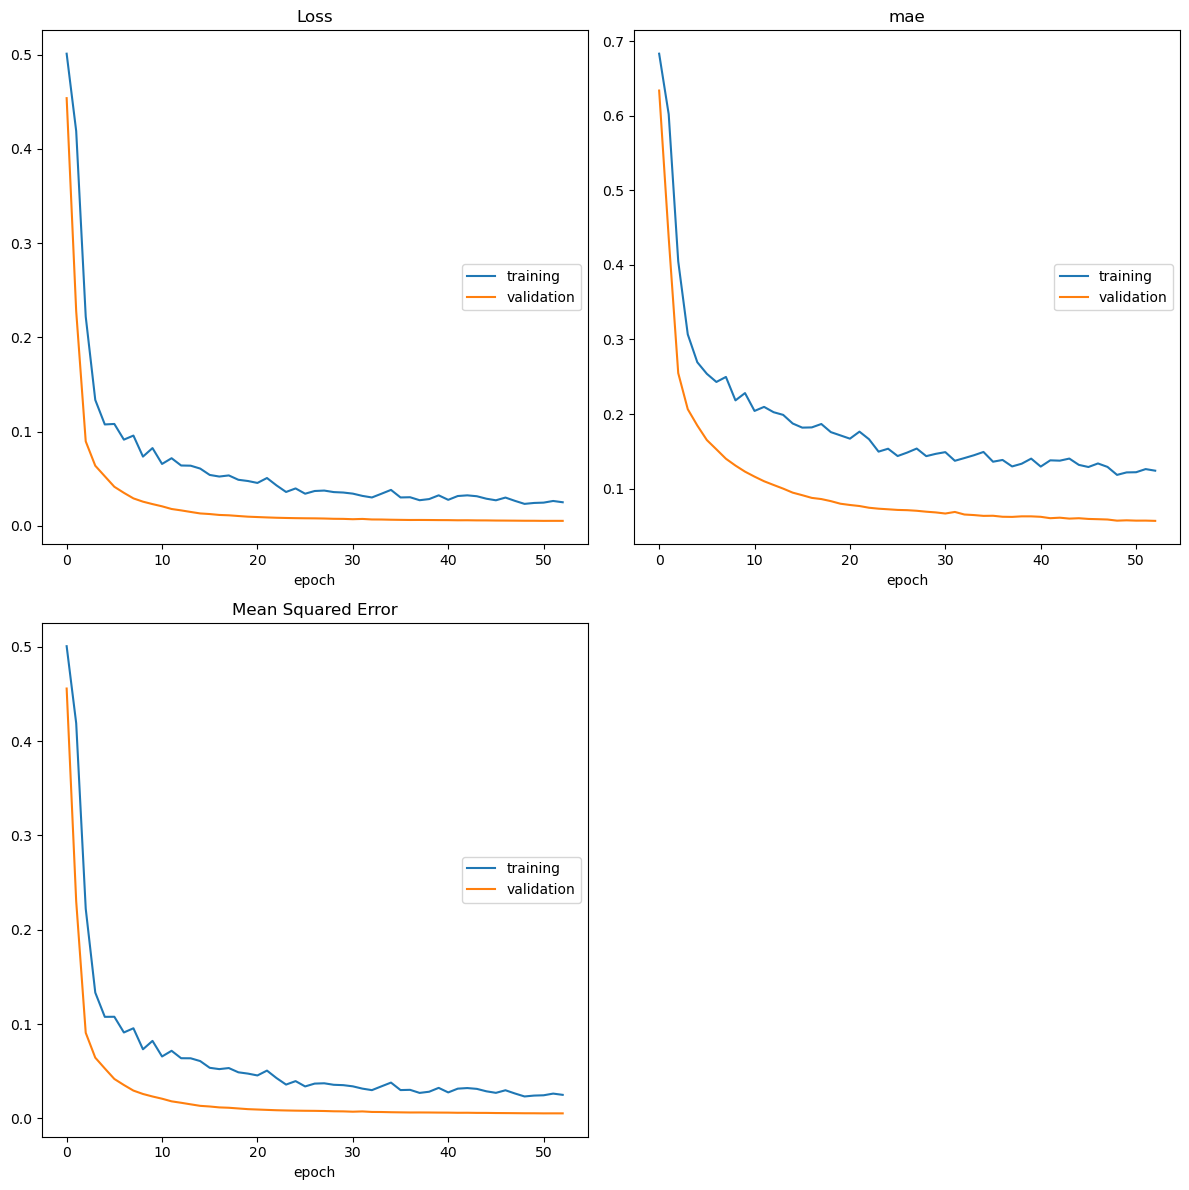

Loss
	training         	 (min:    0.023, max:    0.501, cur:    0.025)
	validation       	 (min:    0.005, max:    0.454, cur:    0.005)
mae
	training         	 (min:    0.119, max:    0.683, cur:    0.124)
	validation       	 (min:    0.057, max:    0.634, cur:    0.057)
Mean Squared Error
	training         	 (min:    0.023, max:    0.501, cur:    0.025)
	validation       	 (min:    0.005, max:    0.456, cur:    0.005)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0254 - mae: 0.1261 - mse: 0.0254 - val_loss: 0.0052 - val_mae: 0.0569 - val_mse: 0.0053
Epoch 53: early stopping


In [21]:
modelo3.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=100, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(), early_stop])

In [22]:
y_pred3 = modelo3.predict(xTest)

# Cálculo de métricas
mae3 = mean_absolute_error(yTest, y_pred3)
mse3 = mean_squared_error(yTest, y_pred3)
print("Error absoluto medio (MAE) - Red con dos capas usando early stopping y dropout,:", mae3)
print("Error cuadrático medio (MSE) - Red con dos capas usando early stopping y dropout,:", mse3)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3038cbba0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Error absoluto medio (MAE) - Red con dos capas usando early stopping y dropout,: 0.0569148119767507
Error cuadrático medio (MSE) - Red con dos capas usando early stopping y dropout,: 0.005320339732244347


En esta parte seguimos utilizando un modelo de RN multicapa, de dos capas, con 256 neuronas cada una. Tambien se mantenienen todos los argumentos sobre la función de perdida y el optimizador en el punto 1. Asi, como la adicion de la función de activación ReLU que su utiliza en el punto 2. Pero, se utilizan las tecnicas de early stopping y dropout para corregir problemas de overfiting en caso de que se esten presentando en el proceso de modelado.

Se aumenta el numero de epocas para visualizar los efectos de la tecnica early stopping y hacer visible el numero de epocas donde se puede presentar overfiting. En este sentido, gracias a la inspección y combinación con earlystoping el numero maximo de epocas econtrado fue de 53. Por lo que, las consideraciones que hemos tenido en los puntos anteriores sobre el numero de epocas para la convergencia de los modelos igual a 50 epocas, parece ser un valor lo suficientemente amplio para garantizar la convergencia de todos los modelos.

Luego de entrenado el modelo de RN multicapa con las caracteristicas señaladas anteriormente e incoporando las tecnicas de early stopping y dropout se presenta un MAE de 0.057 y un MSE de 0.0053. Lo que indica, que el modelo de RN multicapa predice muy bien la probabilidad de que un estudiante sea admitido a la universidad. Pero, el modelo de RN de una capa sigue presentando mejores medidas de desempeño, por lo que incluir capas adicionales o utilizar tecnicas para corregir el overfiting en este caso parecen no tener mejoras para predecir la probabilidad de que un estudiante sea admitido a la universidad.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

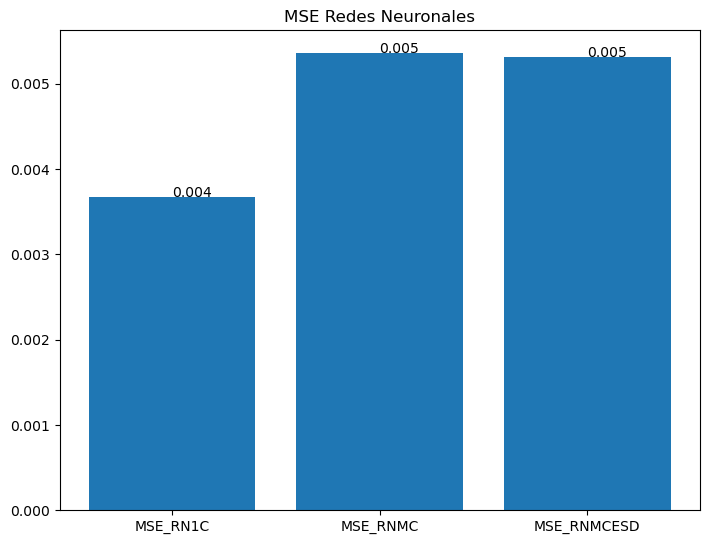

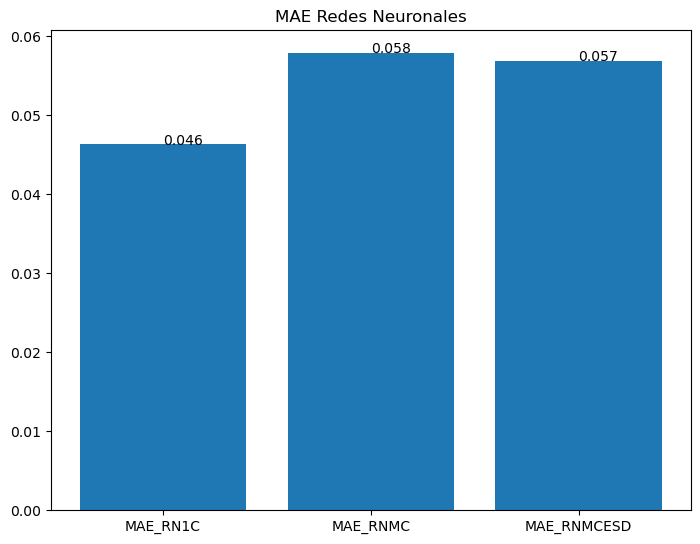

In [23]:
# Celda 4
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("MSE Redes Neuronales")
ejeX = ['MSE_RN1C', 'MSE_RNMC','MSE_RNMCESD']
ejeY = [mse,mse2,mse3]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],round(y[i],3))
addlabels(ejeX,ejeY,plt)
plt.show()

from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("MAE Redes Neuronales")
ejeX = ['MAE_RN1C', 'MAE_RNMC','MAE_RNMCESD']
ejeY = [mae,mae2,mae3]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],round(y[i],3))
addlabels(ejeX,ejeY,plt)
plt.show()

Como se ha venido señalando anteriormente, pero comparando los resultados de todos los modelos de manera unificado, el modelo de RN de una sola capa es el mejor modelo para predecir la probabildiad de que un estudiante sea admitido a la universidad. El modelo de RN de una sola capa es el que presenta las mejores medidas de desempeño, teniendo el MSE y MAE mas bajos entre los tres.